In [58]:
import numpy as np
import pandas as pd
import cv2
import os
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans

In [1]:
url=r'C:\Users\Israel Gitler\Desktop\dogs vs cats\train'
titles=os.listdir(url)
pixels=[]
labels=[]
for t in titles:
    label=t.split('.')[0]
    labels.append(label)
    file=os.path.join(url,t)
    image=Image.open(file)
    #resizing the images to smaller pixels to reduce the dimentions
    im_resized=image.resize((50, 50))
    #changing the images to black and white to reduce the dimentions
    im_black_white=im_resized.convert(mode='L')
    pixels.append((list(im_black_white.getdata())))

# Loading the data and preprocessing

In [2]:
columns=['pixel ' + '{number}'.format(number=i) for i in range(0,2500)]

In [3]:
x = pd.DataFrame(data=pixels, columns=columns)
x.head()

,pixel 0,pixel 1,pixel 2,pixel 3,pixel 4,pixel 5,pixel 6,pixel 7,pixel 8,pixel 9,...,pixel 2490,pixel 2491,pixel 2492,pixel 2493,pixel 2494,pixel 2495,pixel 2496,pixel 2497,pixel 2498,pixel 2499
0,171,179,186,193,197,201,205,208,211,216,...,18,19,14,9,4,4,3,2,2,2
1,41,48,42,46,48,48,40,42,39,44,...,52,54,59,59,49,53,56,59,58,40
2,42,49,55,58,57,56,55,53,49,48,...,76,74,73,73,107,147,148,143,164,164
3,222,224,231,230,227,228,229,228,227,225,...,249,244,240,232,227,215,203,211,219,212
4,107,101,86,120,147,157,205,224,188,236,...,95,99,93,95,97,86,82,101,93,84


In [4]:
y=pd.Series(labels)

## Splitting the data to train and test datasets

In [5]:
x_train, x_test, y_train, y_test = train_test_split (x, y , test_size = 0.1, random_state = 42)

## Let's take a look at some of the images

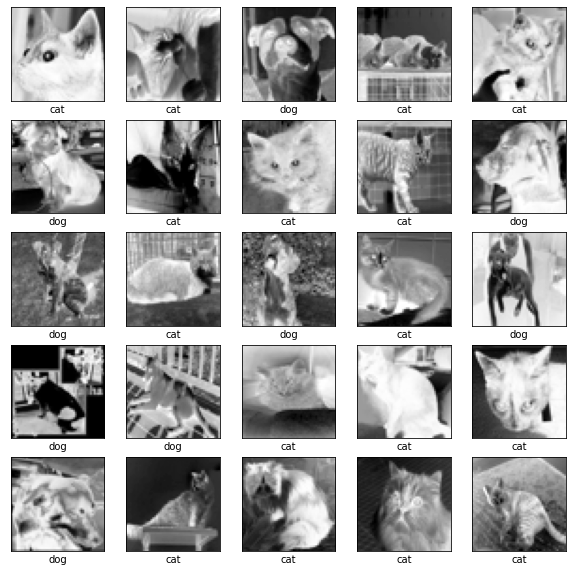

In [6]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train.to_numpy()[i].reshape(50, 50), cmap="binary")
    plt.xlabel(y_train.iloc[i])
plt.show()

# PCA

In [7]:
pca = PCA(n_components = 0.95)
x_reduced = pca.fit_transform(x_train)
x_recovered = pca.inverse_transform(x_reduced)

In [37]:
x_test_reduced = pca.transform(x_test)

In [38]:
x_reduced=pd.DataFrame(x_reduced)
x_test_reduced=pd.DataFrame(x_test_reduced)

x_reduced.head()

,0,1,2,3,4,5,6,7,8,9,...,311,312,313,314,315,316,317,318,319,320
0,-2434.647918,-2093.621870,-914.352161,196.244763,44.436257,582.227763,193.862265,-395.205919,-210.324378,217.636679,...,-20.094379,40.471785,-36.429291,-51.617468,-8.624688,52.352693,21.651800,-31.525971,6.856306,-6.467536
1,-829.224604,820.208265,170.136735,1983.789881,1150.527764,-532.994285,267.211373,62.304190,329.171508,162.590246,...,-11.887736,30.985991,-19.776672,-34.314212,-0.400555,18.476266,23.432221,13.404930,-26.192596,29.625828
2,693.888654,-94.587927,54.161338,1059.989540,-533.910338,-290.550980,-446.491414,338.822633,-534.658485,-577.721768,...,13.029731,20.419066,-1.493090,-6.133189,-15.207100,-27.709391,81.315847,87.021210,-9.133938,7.499818
3,1407.432096,-804.333193,-1480.829168,312.593780,-750.940905,-66.012644,-11.653975,31.000502,-469.919430,189.600816,...,-79.039076,21.248776,-35.747058,-13.063326,54.745303,-62.783994,2.924932,-12.715778,-18.894429,-70.575346
4,-2077.293132,-1292.943184,332.359522,-420.324235,-37.957637,518.047433,241.887715,-65.866155,-86.063442,-362.334255,...,-15.385493,-18.092168,5.767255,103.697922,64.575198,-52.388241,61.037672,-12.971638,24.163215,41.214955


## We see that 321 compomemts explain 95% of the variance

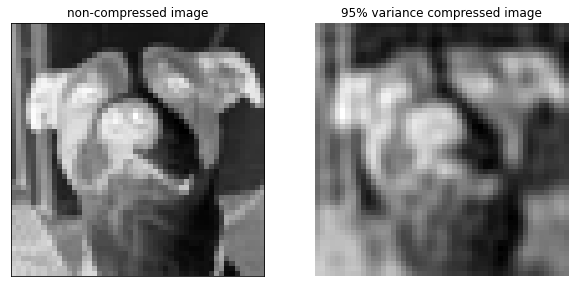

In [9]:
plt.figure(figsize=(10,10))
plt.subplot(1,2, 1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.title('non-compressed image')
plt.imshow(x_train.to_numpy()[2].reshape(50, 50), cmap="binary")


plt.subplot(1,2, 2)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.title('95% variance compressed image')
plt.imshow(x_recovered[2].reshape(50, 50), cmap="binary")

plt.axis("off")
plt.show()

## We can still identify that it is a dog.. let's look for the least components that explain the most variance

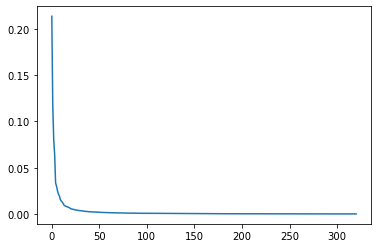

In [10]:
plt.plot(pca.explained_variance_ratio_)

In [11]:
pca.explained_variance_ratio_[:20]

array([0.21369248, 0.11850168, 0.0811362 , 0.06449151, 0.03368057,
       0.02992641, 0.02516378, 0.02151414, 0.01955859, 0.01563676,
       0.01402905, 0.0130333 , 0.01119433, 0.00945693, 0.00880807,
       0.00845144, 0.00773563, 0.00767929, 0.00704097, 0.0065119 ])

## Most of the variance lies along the first 13 components (holds more than 1% of variance)

## let's look what happens if we try to reduce the components to 13:


In [12]:
pca_13 = PCA(n_components = 13)
x_reduced_13 = pca_13.fit_transform(x_train)
x_recovered_13 = pca_13.inverse_transform(x_reduced_13)

13 components compressed image


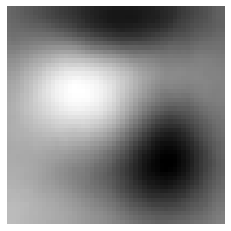

In [13]:
print('13 components compressed image')
plt.imshow(x_recovered_13[2].reshape(50, 50), cmap="binary")
plt.axis("off")
plt.show()

### We can see that when we used only the 13 highest components (that explain the data) we got an unrecognizable image. 
### so we will stay with the 321 components- which is still pretty amazing to reduce from 2500 pixels of the original images.

## Dummy Model

Because our data is 50% 50% of cats and dogs, the best dummy model will simply say that all the images are either a cat or a dog and will get a 50% accuracy.(we don't think that it is needed to show this in the code because it is too obvious)

# KNN Classifier

### knn with PCA reduced data

In [16]:
knn=KNeighborsClassifier()

In [17]:
scores=cross_val_score(knn, x_reduced, y_train, cv=10)
knn_score = scores.mean()
print(knn_score)

0.5868444444444444


### Knn with k-means clustring

In [18]:
knn_k_means=KNeighborsClassifier()

In [25]:
pipeline=Pipeline([("kmeans", KMeans(n_clusters=20)), ("knn", knn_k_means)])
scores=cross_val_score(pipeline, x_train, y_train, cv=10)
knn_k_means_score = scores.mean()
print(knn_k_means_score)


0.5469777777777778


# logistic regression

### logistic regression with pca reduced data

In [49]:
log_reg= LogisticRegression(random_state=42, solver='liblinear')

In [50]:
scores=cross_val_score(log_reg, x_reduced, y_train, cv=10)
log_reg_score = scores.mean()
print(log_reg_score)

0.5586666666666666


### logistic regression with k-means clustring

In [51]:
log_reg_k_means= LogisticRegression(random_state=42, solver='liblinear')

In [52]:
pipeline=Pipeline([("kmeans", KMeans(n_clusters=20)), ("log_reg", log_reg_k_means)])
scores=cross_val_score(pipeline, x_train, y_train, cv=10)
log_reg_k_means_score = scores.mean()
print(log_reg_k_means_score)

0.5857777777777777


# Randon forest classifier

### Randon forest classifier with pca reduced data

In [77]:
rfc=RandomForestClassifier(random_state=42) 

In [78]:
scores=cross_val_score(rfc, x_reduced, y_train, cv=10)
rfc_score = scores.mean()
print(rfc_score)

0.6046222222222222


### random forest with k-means clustring

In [28]:
rfc_k_means=RandomForestClassifier(random_state=42) 

In [29]:
pipeline=Pipeline([("kmeans", KMeans(n_clusters=20)), ("rfc", rfc_k_means)])
scores=cross_val_score(pipeline, x_train, y_train, cv=10)
rfc_k_means_score = scores.mean()
print(rfc_k_means_score)

0.5748444444444444


## Naive bayes

### Naive bayes with PAC reduced data

In [79]:
gnb = GaussianNB()

In [80]:
scores=cross_val_score(gnb, x_reduced, y_train, cv=10)
gnb_score = scores.mean()
print(gnb_score)

0.5664


### Naive bayes with k-means clustring

In [33]:
gnb_k_means=GaussianNB()

In [34]:
pipeline=Pipeline([("kmeans", KMeans(n_clusters=20)), ("gnb", gnb_k_means)])
scores=cross_val_score(pipeline, x_train, y_train, cv=10)
gnb_k_means_score = scores.mean()
print(gnb_k_means_score)

0.5658222222222222


## We see that there is no big difference between the scores of the reduced data and using the k-means. so from now on we'll continue only with the pca reduced data

## voting classifier

### we' ll take 3 different models and try an ensamble learning method of voting classifier (hard and soft) to get a better score

In [55]:
clf1=KNeighborsClassifier()
clf2=RandomForestClassifier(random_state=42) 
clf3=GaussianNB()
labels=['Knn','Random forest','Naive Beyes']
voting_clf_hard= VotingClassifier(estimators=[(labels[0],clf1),
                                            (labels[1],clf2),
                                            (labels[2],clf3),],
                                 voting='hard')
voting_clf_soft= VotingClassifier(estimators=[(labels[0],clf1),
                                            (labels[1],clf2),
                                            (labels[2],clf3),],
                                 voting='soft')

In [56]:
voting_clf_scores = []
for (clf, label) in zip([voting_clf_hard, voting_clf_soft],['Voting Classifier Hard', 'Voting Classifier Soft']):
    scores= cross_val_score(clf,x_reduced,y_train,cv=5,scoring='accuracy')
    voting_clf_scores.append(scores.mean())
    print('Accuracy of '+ label+':', scores.mean(),'%')

voting_clf_hard_score = voting_clf_scores[0]
voting_clf_soft_score = voting_clf_scores[1]

Accuracy of Voting Classifier Hard: 0.6146222222222223 %
Accuracy of Voting Classifier Soft: 0.5974666666666667 %


### we got the best score yet using the 'hard' voting classifier-still not a great score but it's an improvment:)

## AdaBoost- using decision tree classifier

In [83]:
ada=AdaBoostClassifier(DecisionTreeClassifier(), n_estimators=100, algorithm="SAMME.R", learning_rate=0.5)
scores=cross_val_score(ada, x_reduced, y_train, cv=10)
ada_score = scores.mean()
print(ada_score)

0.5430222222222222


# Running our best model on the test set

### Our best model was the hard voing classifier, so we will run it on the whole data and test it on the test data to get the real score

In [40]:
voting_clf_hard.fit(x_reduced, y_train)
voting_clf_hard.score(x_test_reduced, y_test)

0.6056

# In conclusion: 
## we see that even when we try a couple models, kmeans and pca method, and different ensemble learning methods we don't improve the scores by a lot. we knew that we won't get great scores because we are not using image processing methods.. it still sucks but we did our best and we learned a lot through the process  